In [2]:
%run SetupNSTNetworks.py
%run TrainNSTNetworks.py


cuda


In [3]:
style_img = image_loader("./ArtExamples/M1_AdamEve.jpeg")
content_img = image_loader("./ContentImages/Pagoda.jpeg")
input_img = content_img.clone()
print(style_img.size(), " ", content_img.size())

assert style_img.size() == content_img.size(), \
    "we need to import style and content images of the same size"

cnn, cnn_normalization_mean, cnn_normalization_std, content_layers, style_layers, style_weight = setup_SqueezeNet()

RuntimeError: CUDA error: out of memory
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


Building the style transfer model..
run [50]:
Style Loss : 1615236.000000 Content Loss: 13.866982
run [100]:
Style Loss : 674634.437500 Content Loss: 15.739027
run [150]:
Style Loss : 441010.093750 Content Loss: 16.741938
run [200]:
Style Loss : 340518.593750 Content Loss: 17.307295
run [250]:
Style Loss : 283555.562500 Content Loss: 17.784128
run [300]:
Style Loss : 246338.140625 Content Loss: 18.156477


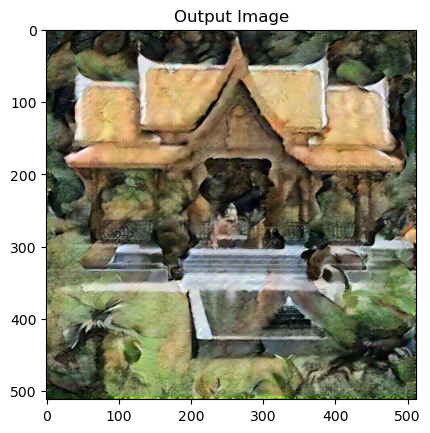

In [15]:
output, model = run_style_transfer(cnn, cnn_normalization_mean, cnn_normalization_std,
                            content_img, style_img, input_img, content_layers, style_layers,
                            style_weight=style_weight, num_steps=300)

plt.figure()
imshow(input_img, title='Output Image')

In [16]:
save_out = transforms.functional.to_pil_image(input_img.squeeze())
save_out.save("Pagoda5.jpg")